# 데이처 전처리
- 데이터 전처리의 기초
- 데이터 전처리의 전략
- 데이터 전처리의 실습
#### 학습목표
- 데이터 전처리의 개념과 데이터 품질 문제에 대해 알아본다.
- 결측치 처리하기, 범주형 데이터 처리하기, 범주형 데이터로 변환하여 처리하기, 데이터의 크기 맞추기 등 데이터 전처리 전략에 대해 알아본다.
- 타이타닉 생존자를 예측하는 데이터 전처리 실습을 진행한다.
### 데이터 전처리의 기초

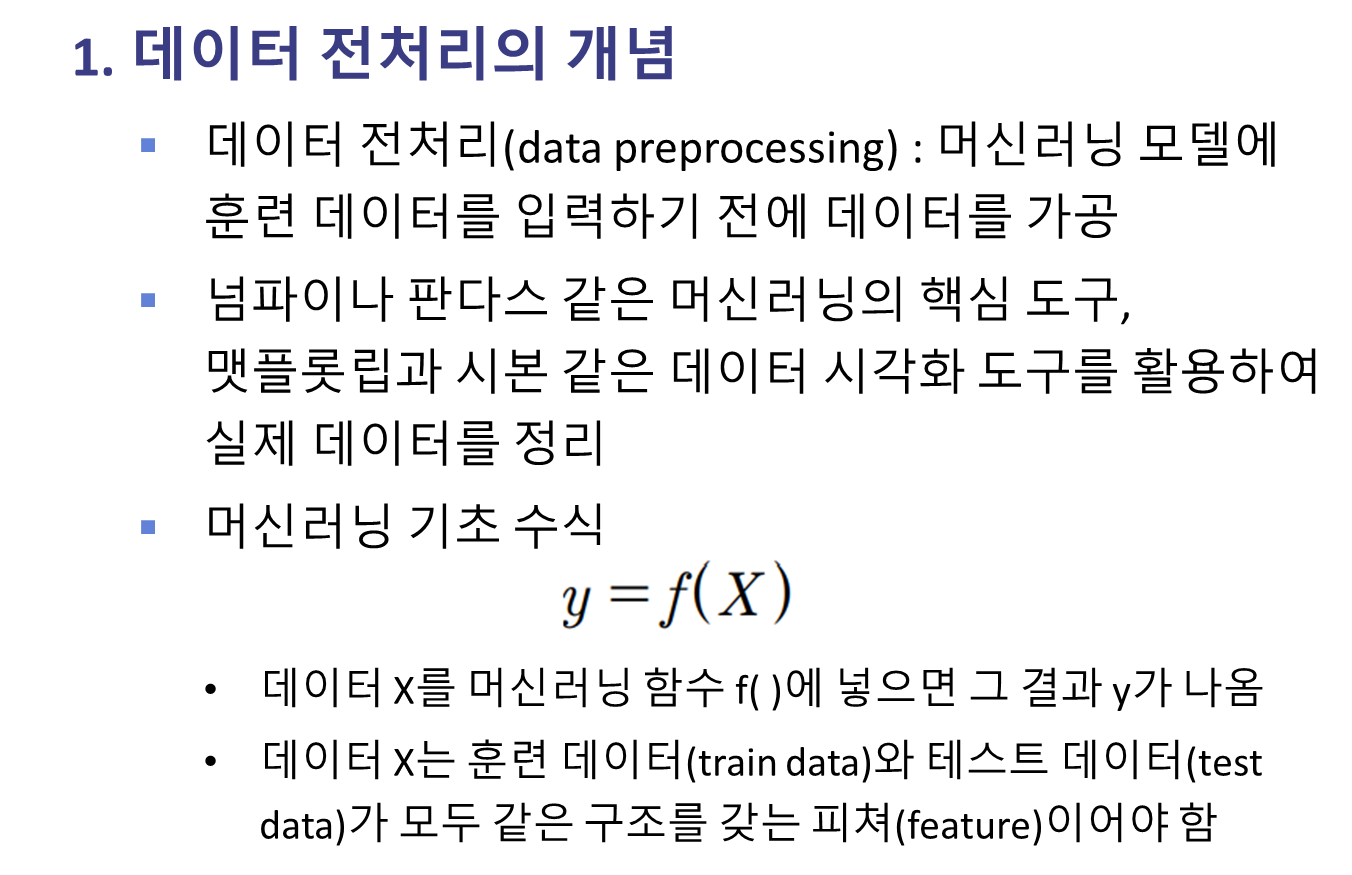

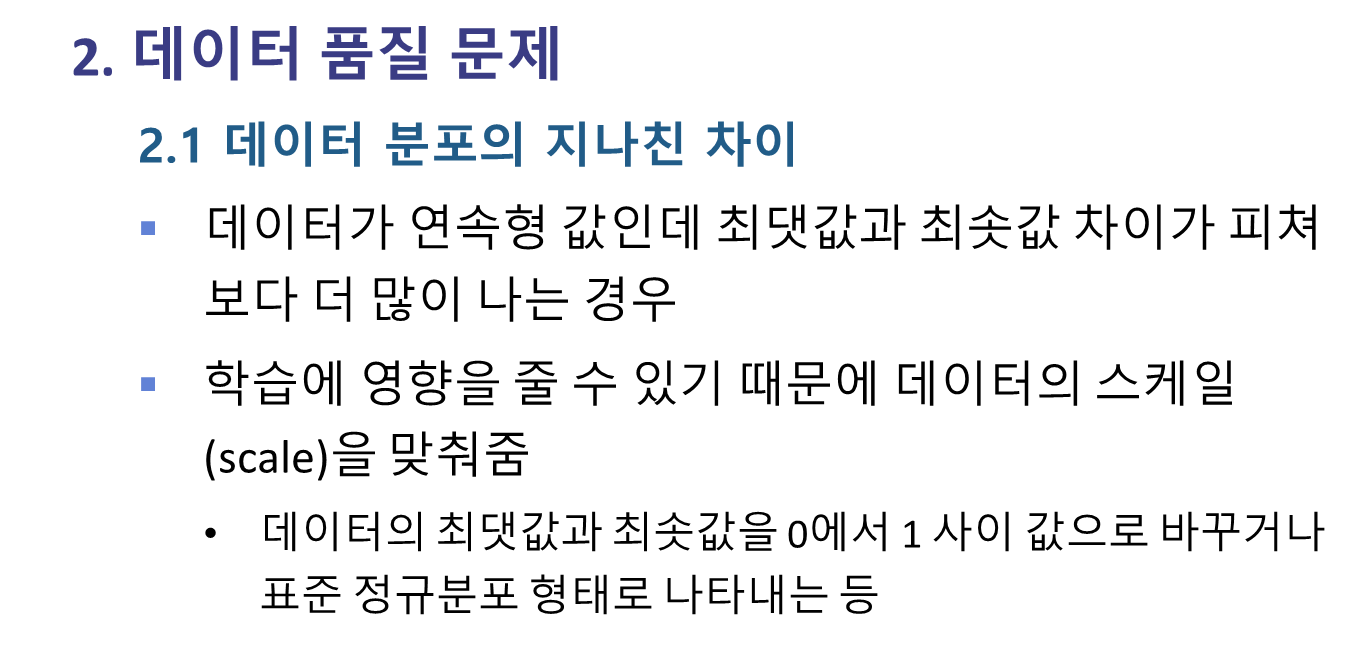

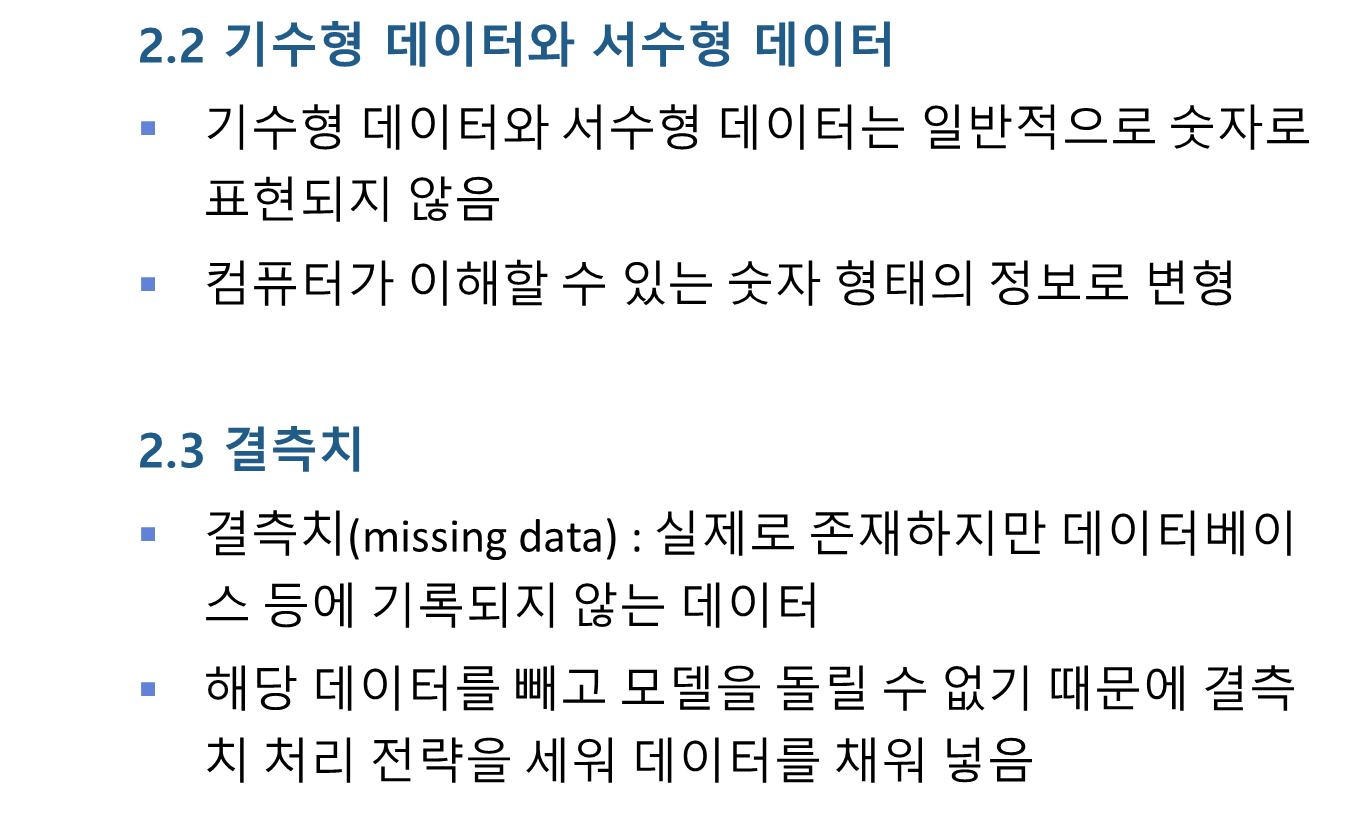

- 기수 & 서수 : https://wikidocs.net/22037

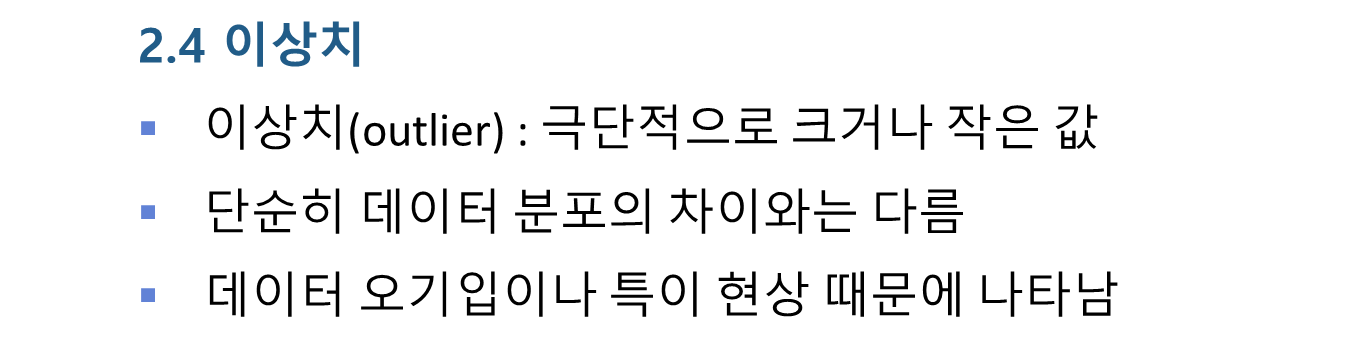

### 데이터 전처리의 전략


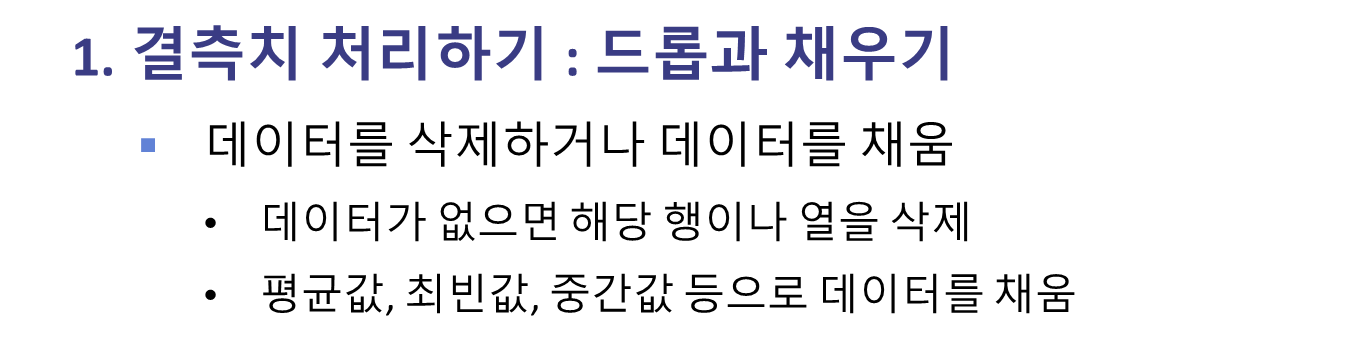

In [4]:
import pandas as pd
import numpy as np

raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'],
            'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'],
            'age': [42, np.nan, 36, 24, 73],
            'sex': ['m', np.nan, 'f', 'm', 'f'],
            'preTestScore': [4, np.nan, np.nan, 2, 3],
            'postTestScore': [25, np.nan, np.nan, 62, 70]}

df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


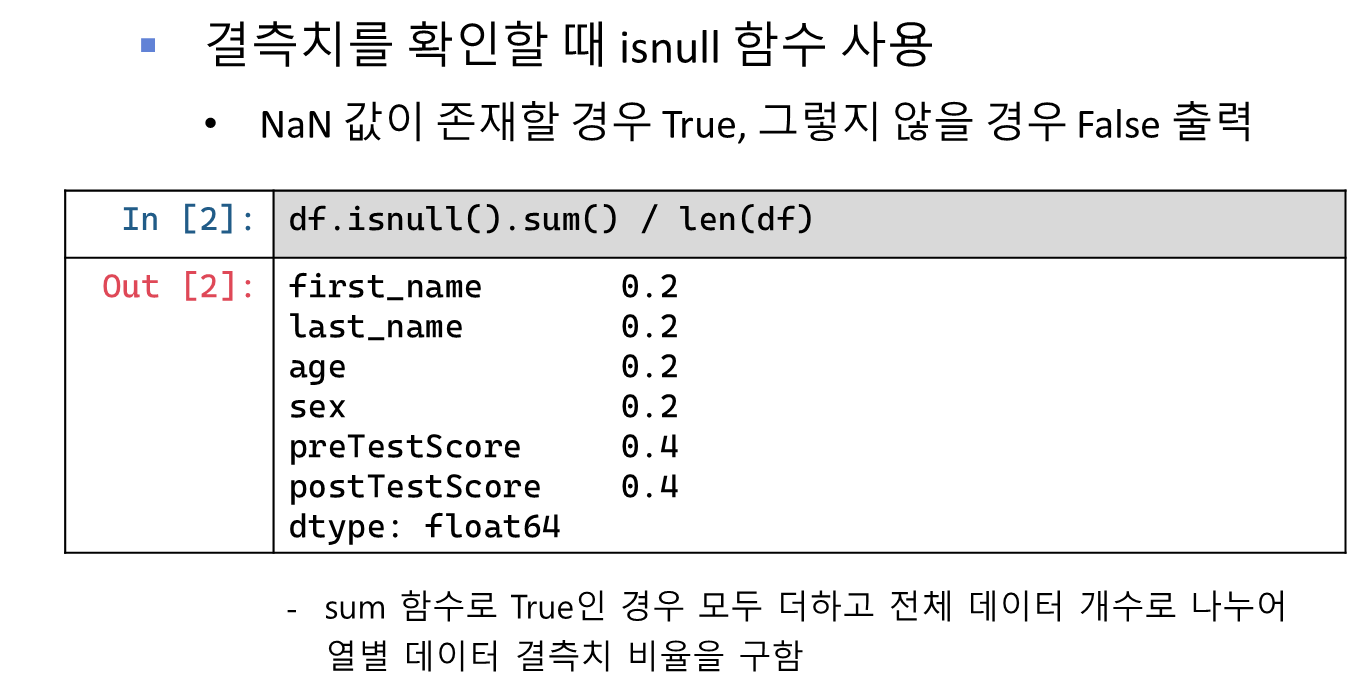

In [5]:
# 결측치 비율
df.isnull().sum() / len(df)

first_name       0.2
last_name        0.2
age              0.2
sex              0.2
preTestScore     0.4
postTestScore    0.4
dtype: float64

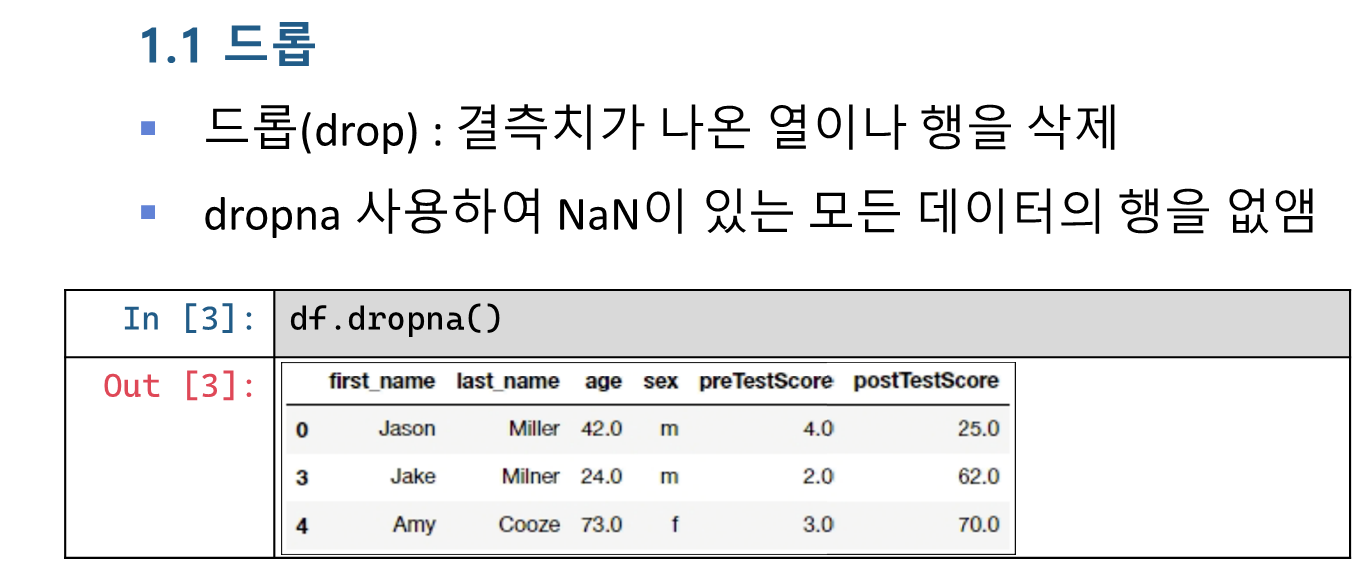

In [6]:
df.dropna()


,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


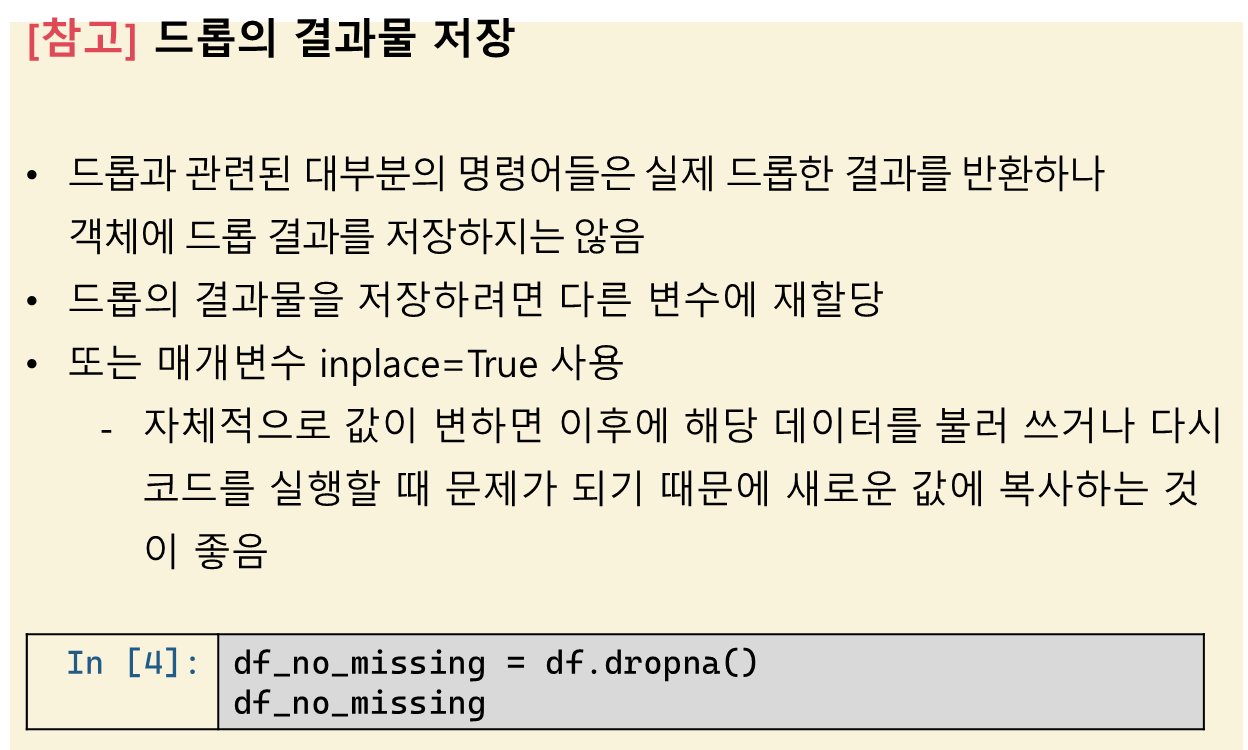

In [8]:
df_no_missing = df.dropna()
df_no_missing

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


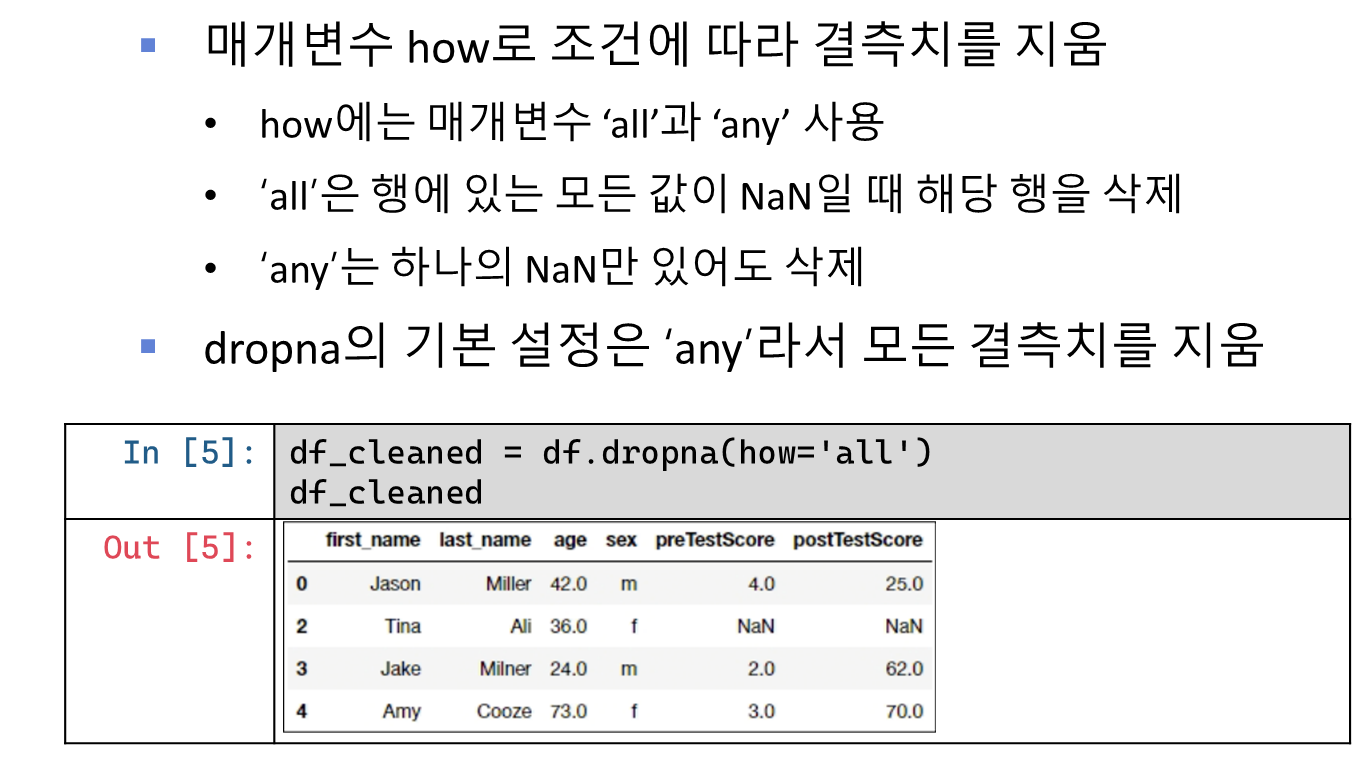

In [9]:
df_cleaned = df.dropna(how='all')
df_cleaned

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


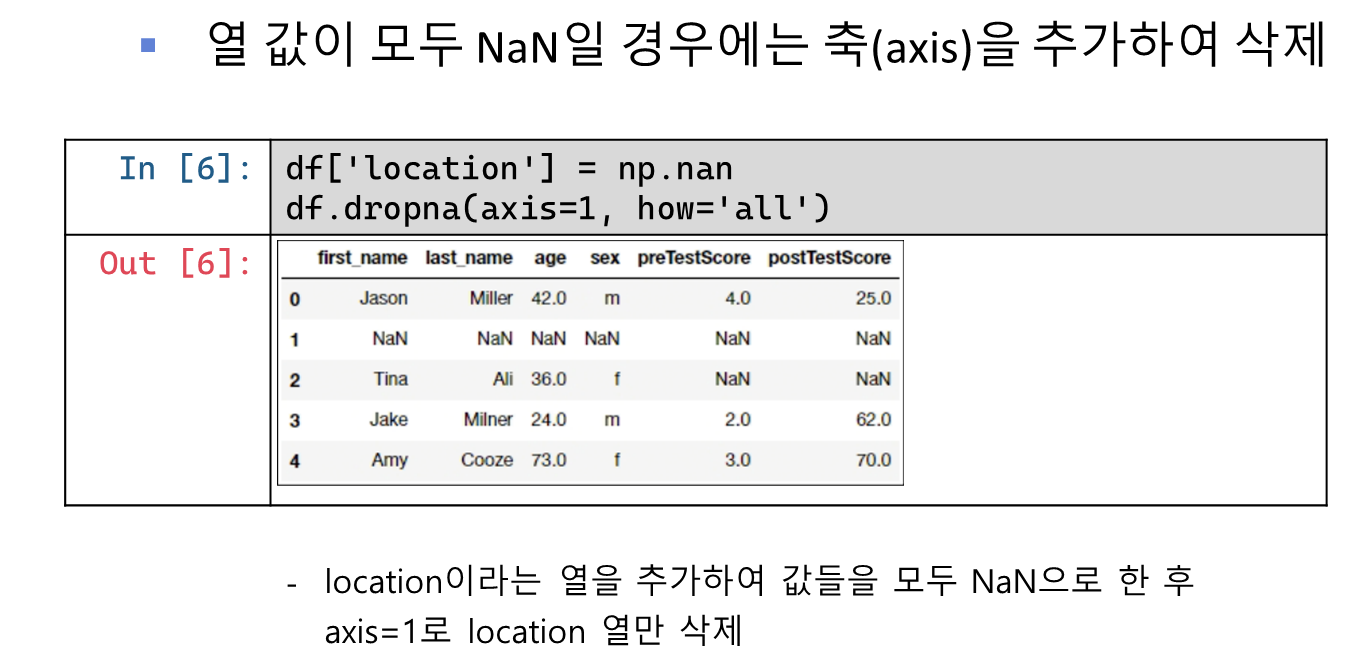

In [10]:
df['location'] = np.nan
df.head(3)


,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN


In [11]:
# axis=1 열
df.dropna(axis=1, how='all')

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


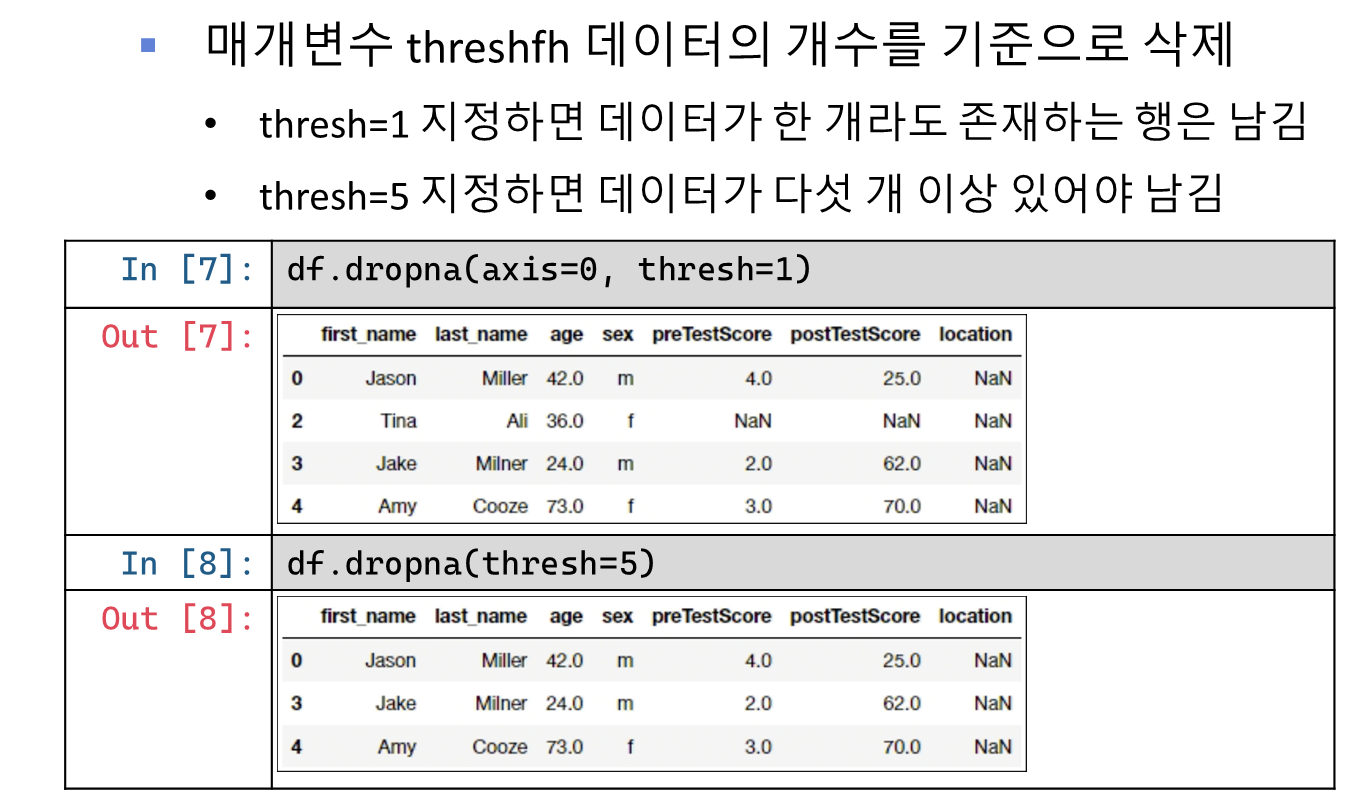

In [12]:
df.dropna(axis=0, thresh=1)

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [13]:
df.dropna(thresh=5)

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


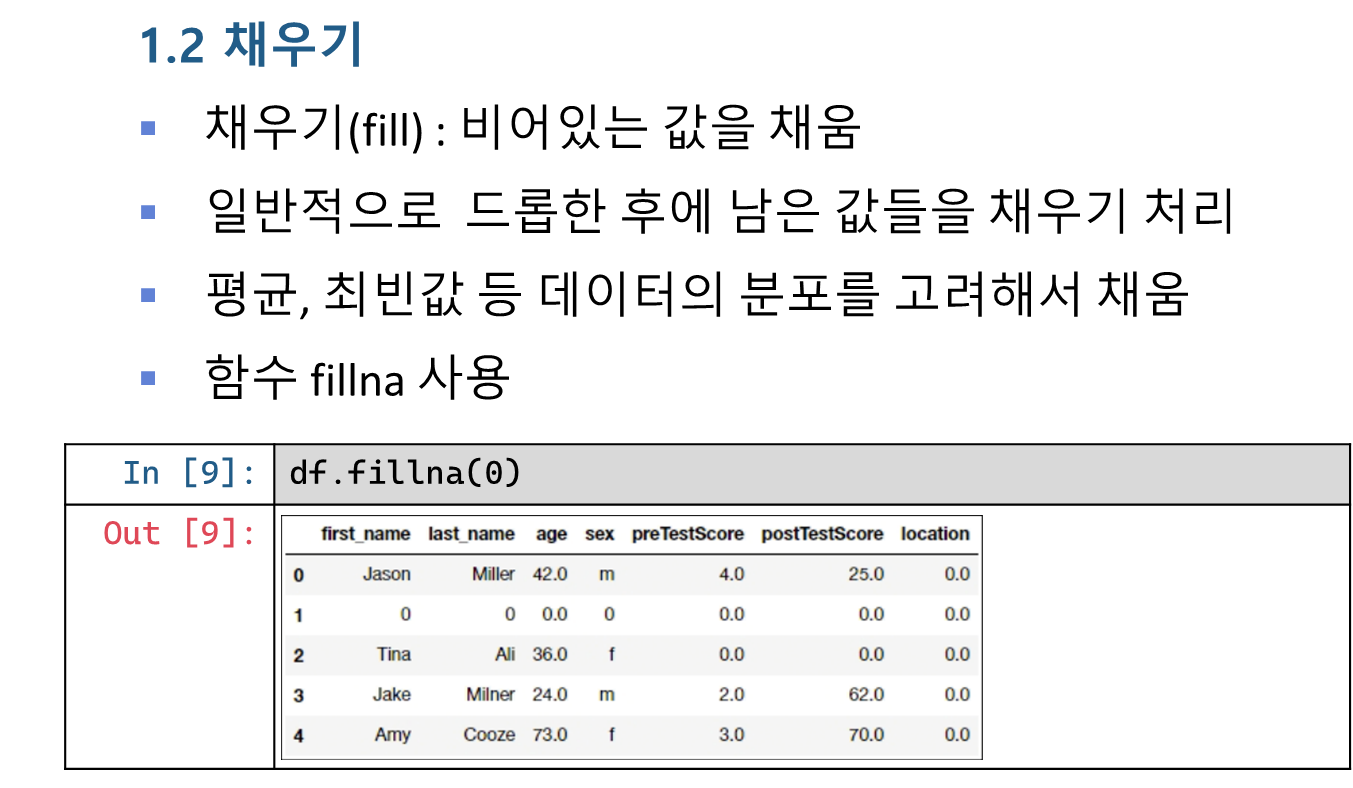

In [14]:
# 0 으로 채우기
df.fillna(0)

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,0.0
1,0,0,0.0,0,0.0,0.0,0.0
2,Tina,Ali,36.0,f,0.0,0.0,0.0
3,Jake,Milner,24.0,m,2.0,62.0,0.0
4,Amy,Cooze,73.0,f,3.0,70.0,0.0


In [15]:
# 평균으로 채우기
df["preTestScore"].fillna(df["preTestScore"].mean(), inplace=True)
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,Tina,Ali,36.0,f,3.0,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


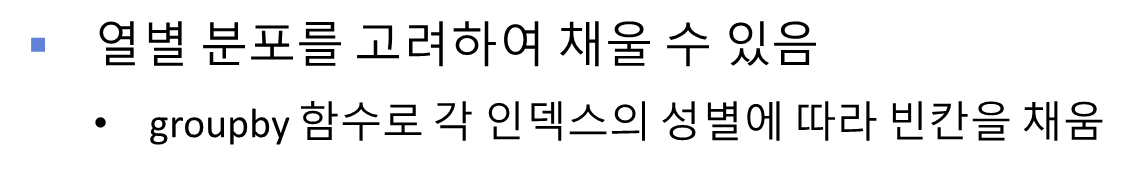

In [16]:
# 성별로 평균값 만들기, NaN 안만들어짐
df.groupby("sex")[
    "postTestScore"].transform(
    "mean")

0    43.5
1     NaN
2    70.0
3    43.5
4    70.0
Name: postTestScore, dtype: float64

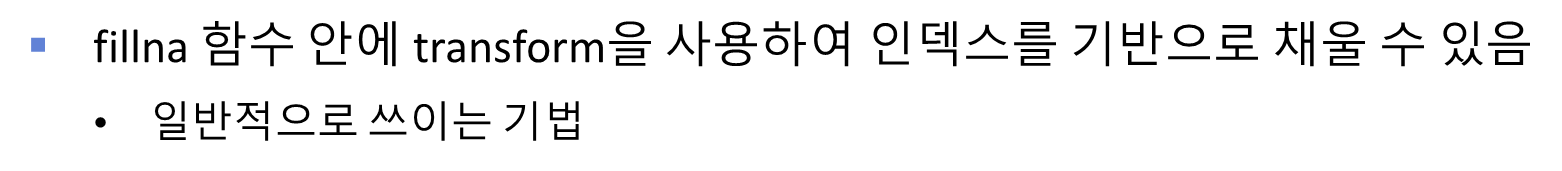

In [17]:
# na에 성별로 만든 평균값 채우기
df["postTestScore"].fillna(
df.groupby("sex")["postTestScore"].transform("mean"), inplace=True)
df


,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,Tina,Ali,36.0,f,3.0,70.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


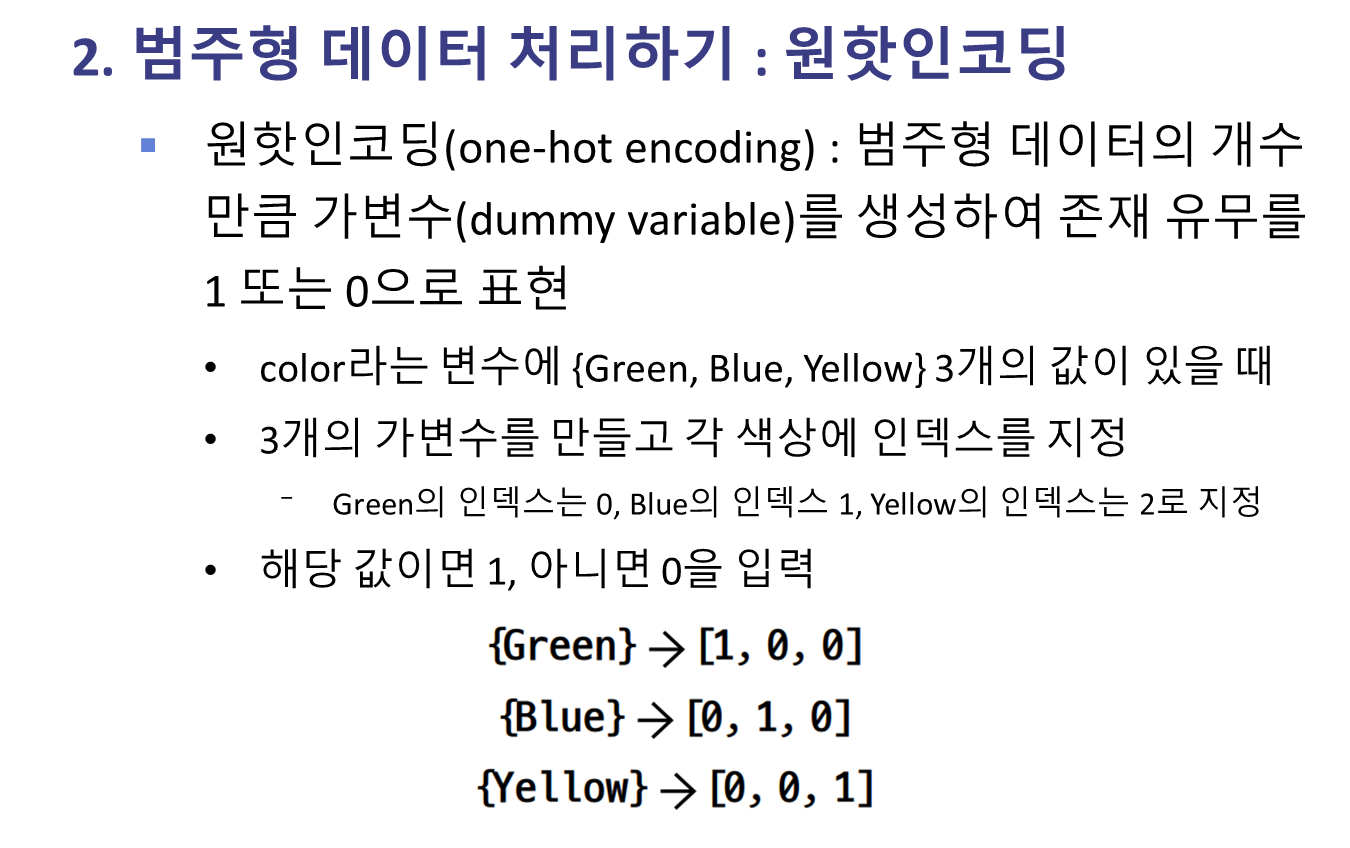

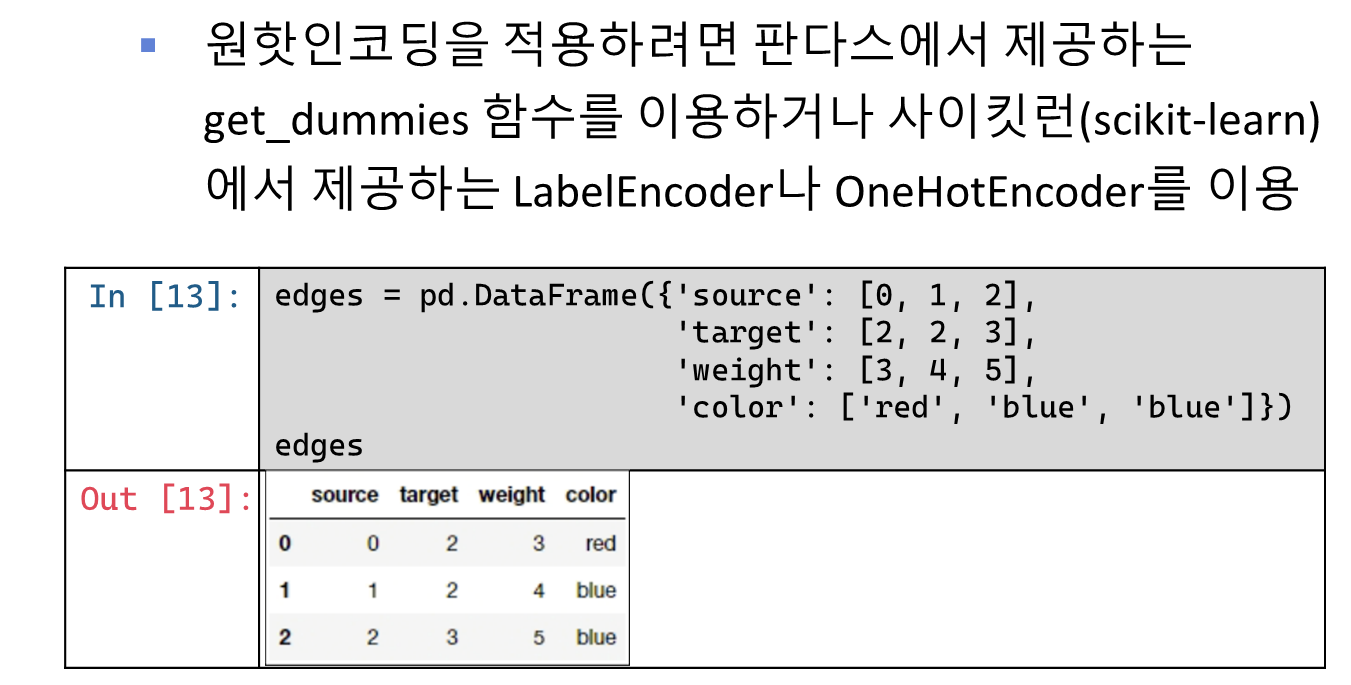

In [18]:
edges = pd.DataFrame({'source': [0, 1, 2], 'target': [2, 2, 3],
                      'weight': [3, 4, 5], 'color': ['red', 'blue', 'blue']})
edges


,source,target,weight,color
0,0,2,3,red
1,1,2,4,blue
2,2,3,5,blue


In [19]:
edges.dtypes


source     int64
target     int64
weight     int64
color     object
dtype: object

In [20]:
pd.get_dummies(edges)


,source,target,weight,color_blue,color_red
0,0,2,3,0,1
1,1,2,4,1,0
2,2,3,5,1,0


In [21]:
pd.get_dummies(edges["color"])


,blue,red
0,0,1
1,1,0
2,1,0


In [22]:
pd.get_dummies(edges[["color"]])


,color_blue,color_red
0,0,1
1,1,0
2,1,0


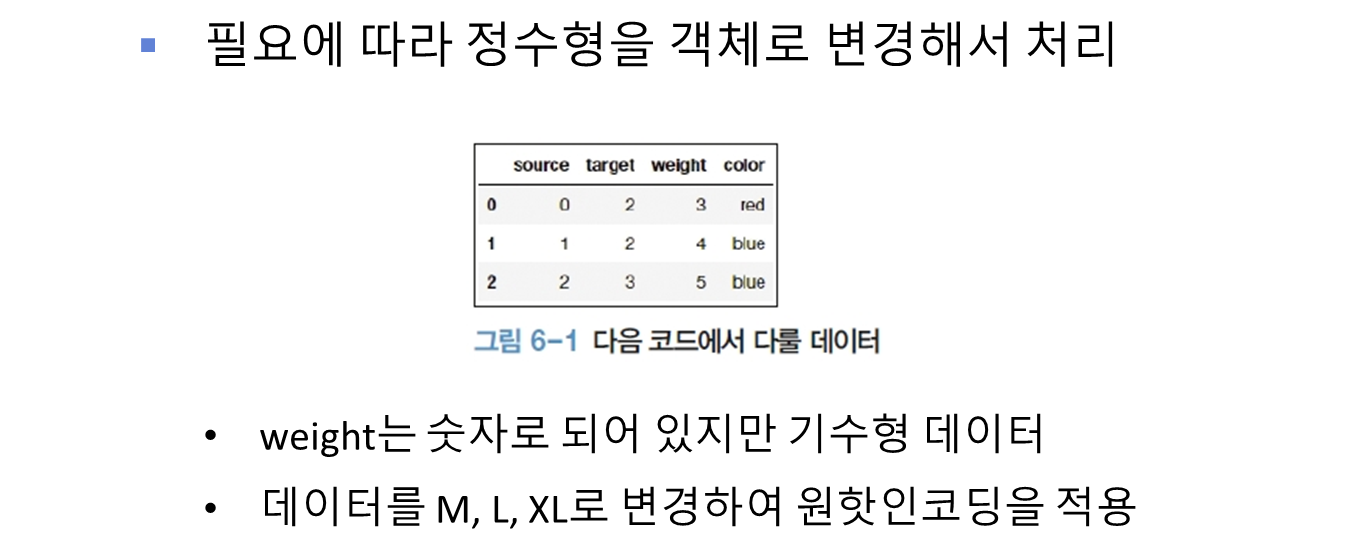

In [23]:
weight_dict = {3:"M", 4:"L", 5:"XL"}
edges["weight_sign"] = edges["weight"].map(weight_dict)
weight_sign = pd.get_dummies(edges["weight_sign"])
weight_sign


,L,M,XL
0,0,1,0
1,1,0,0
2,0,0,1


In [24]:
pd.concat([edges, weight_sign], axis=1)


,source,target,weight,color,weight_sign,L,M,XL
0,0,2,3,red,M,0,1,0
1,1,2,4,blue,L,1,0,0
2,2,3,5,blue,XL,0,0,1


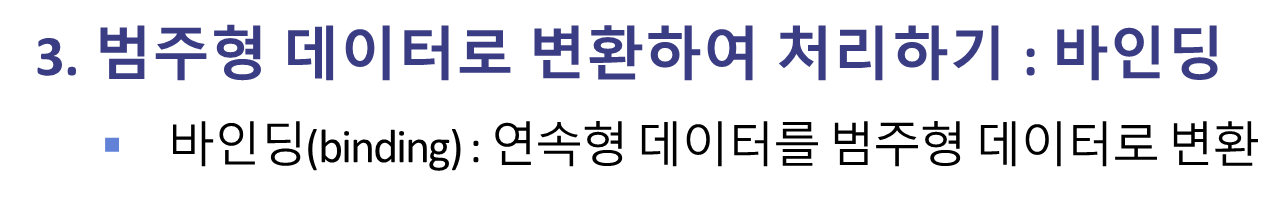

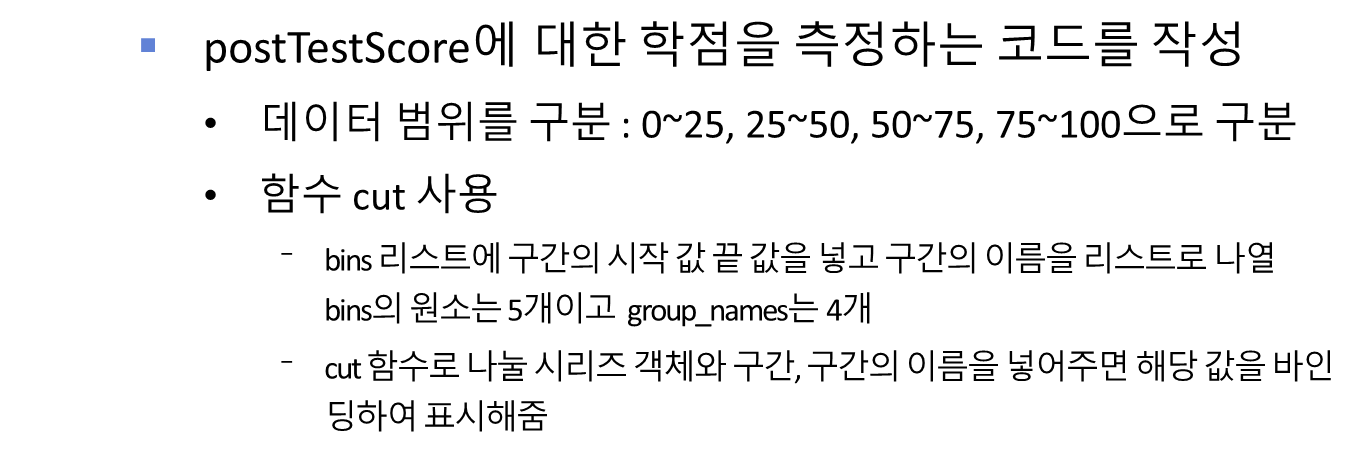

In [25]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
            'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
            'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'],
            'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}

df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'name', 'preTestScore', 'postTestScore'])
df


,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


In [26]:
bins = [0, 25, 50, 75, 100] # bins 정의(0-25, 25-50, 60-75, 75-100)
group_names = ['Low', 'Okay', 'Good', 'Great']
categories = pd.cut(
df['postTestScore'], bins, labels=group_names)
categories


0       Low
1     Great
2      Good
3      Good
4      Good
5       Low
6     Great
7      Good
8      Good
9      Good
10     Good
11     Good
Name: postTestScore, dtype: category
Categories (4, object): ['Low' < 'Okay' < 'Good' < 'Great']

In [27]:
# 열추가
df['categories'] = categories


In [28]:
df.head()


,regiment,company,name,preTestScore,postTestScore,categories
0,Nighthawks,1st,Miller,4,25,Low
1,Nighthawks,1st,Jacobson,24,94,Great
2,Nighthawks,2nd,Ali,31,57,Good
3,Nighthawks,2nd,Milner,2,62,Good
4,Dragoons,1st,Cooze,3,70,Good


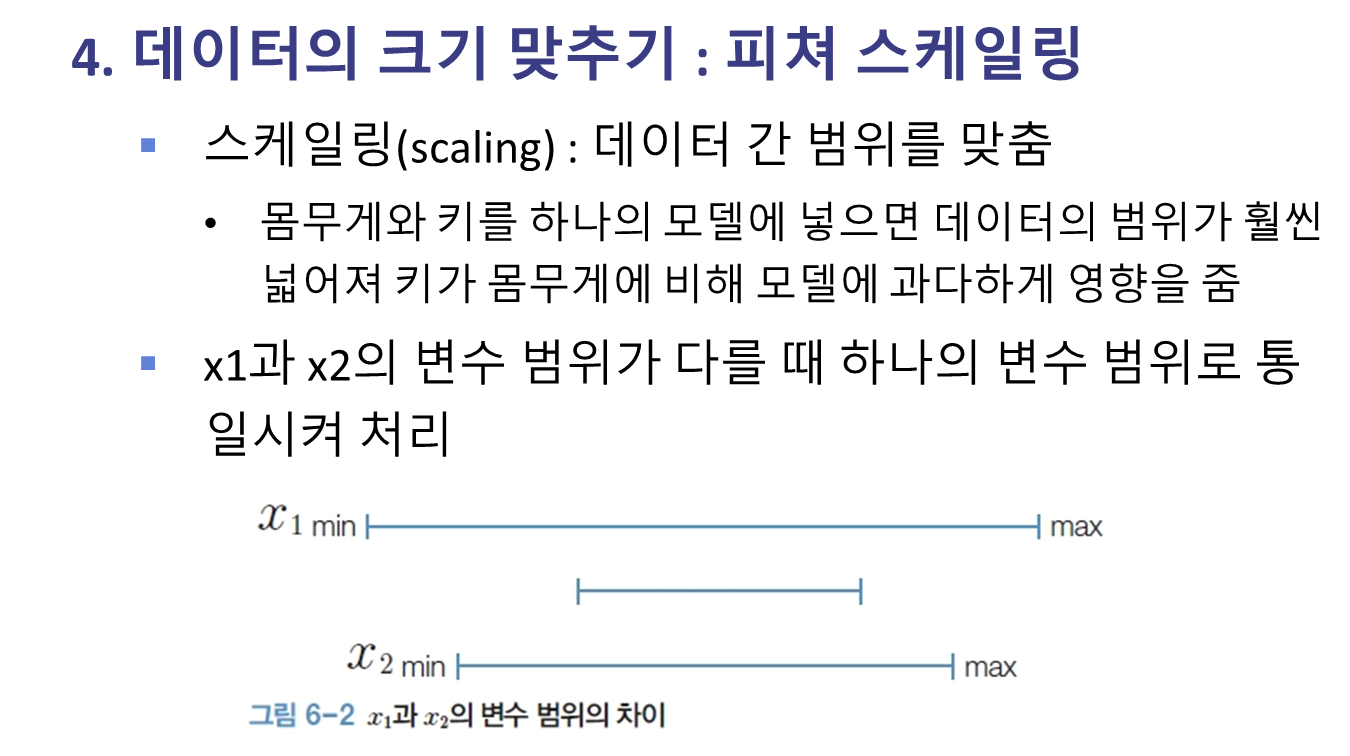

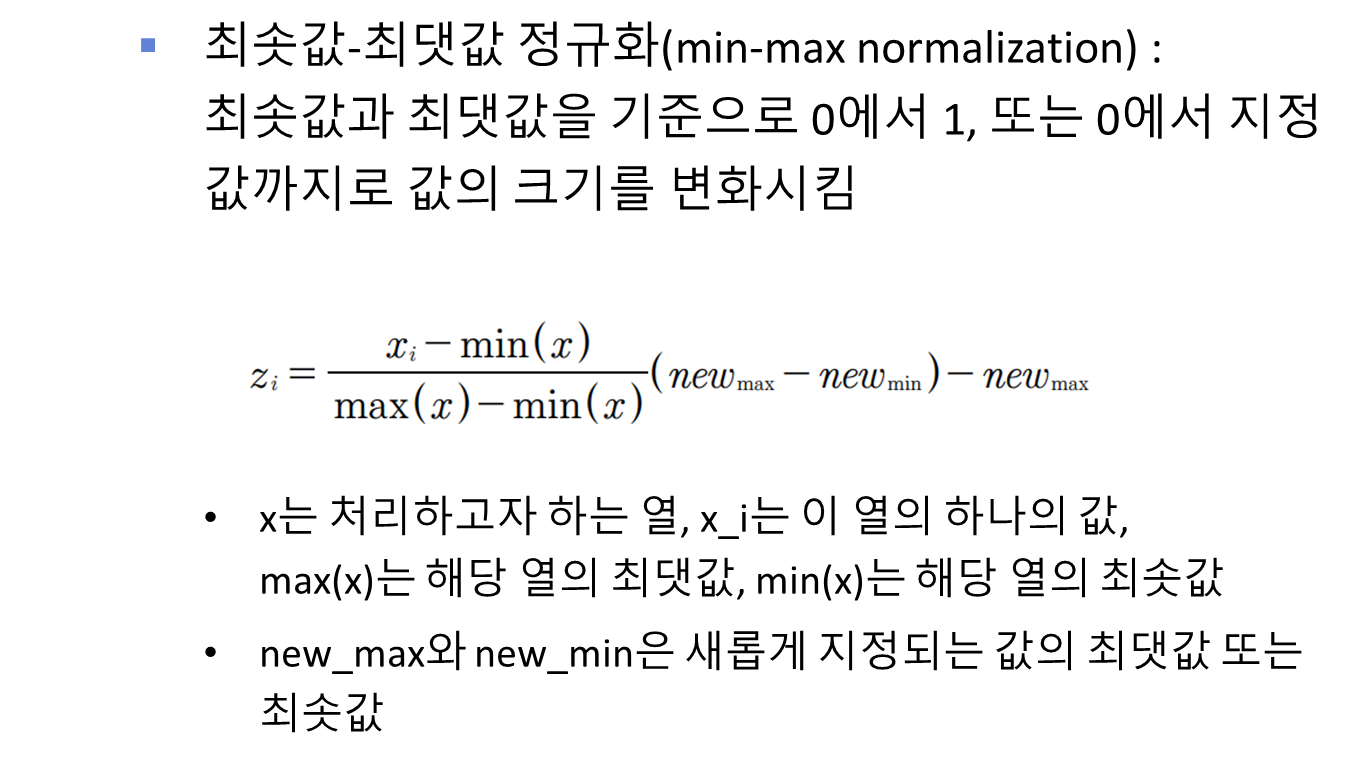

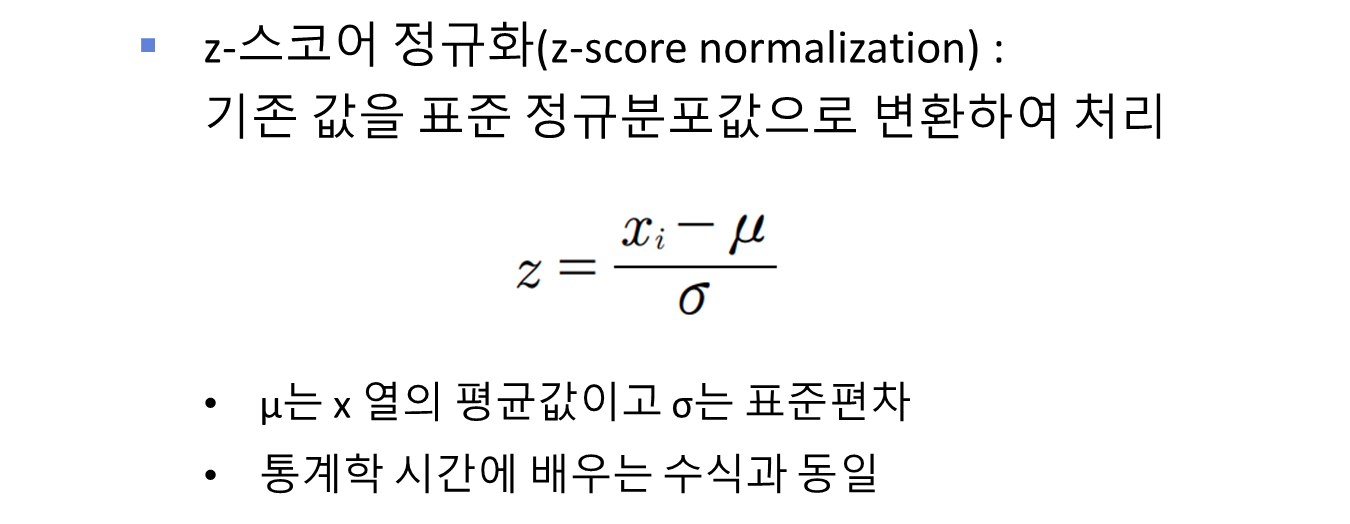

In [29]:
df = pd.DataFrame(
    {'A':[14.00,90.20,90.95,96.27,91.21],
     'B':[103.02,107.26,110.35,114.23,114.68],
     'C':['big','small','big','small','small']})

df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


In [30]:
df["A"] - df["A"].min()

0     0.00
1    76.20
2    76.95
3    82.27
4    77.21
Name: A, dtype: float64

In [31]:
# min-max
( df["A"] - df["A"].min() ) / (df["A"].max() - df["A"].min())


0    0.000000
1    0.926219
2    0.935335
3    1.000000
4    0.938495
Name: A, dtype: float64

In [32]:
# 표준정규분포 z 값
( df["B"] - df["B"].mean() ) / (df["B"].std())


0   -1.405250
1   -0.540230
2    0.090174
3    0.881749
4    0.973556
Name: B, dtype: float64